In [1]:
%reset
%load_ext autoreload
%autoreload 2

Nothing done.


In [2]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from uncertainties import *
from uncertainties import unumpy as unp
from math import ceil

savedir = "N01/"

In [3]:
all_data = loader.load_data( "../Plans20221106ForUngaussianityscan_20221106_v2/**/" )
data = all_data
loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

30

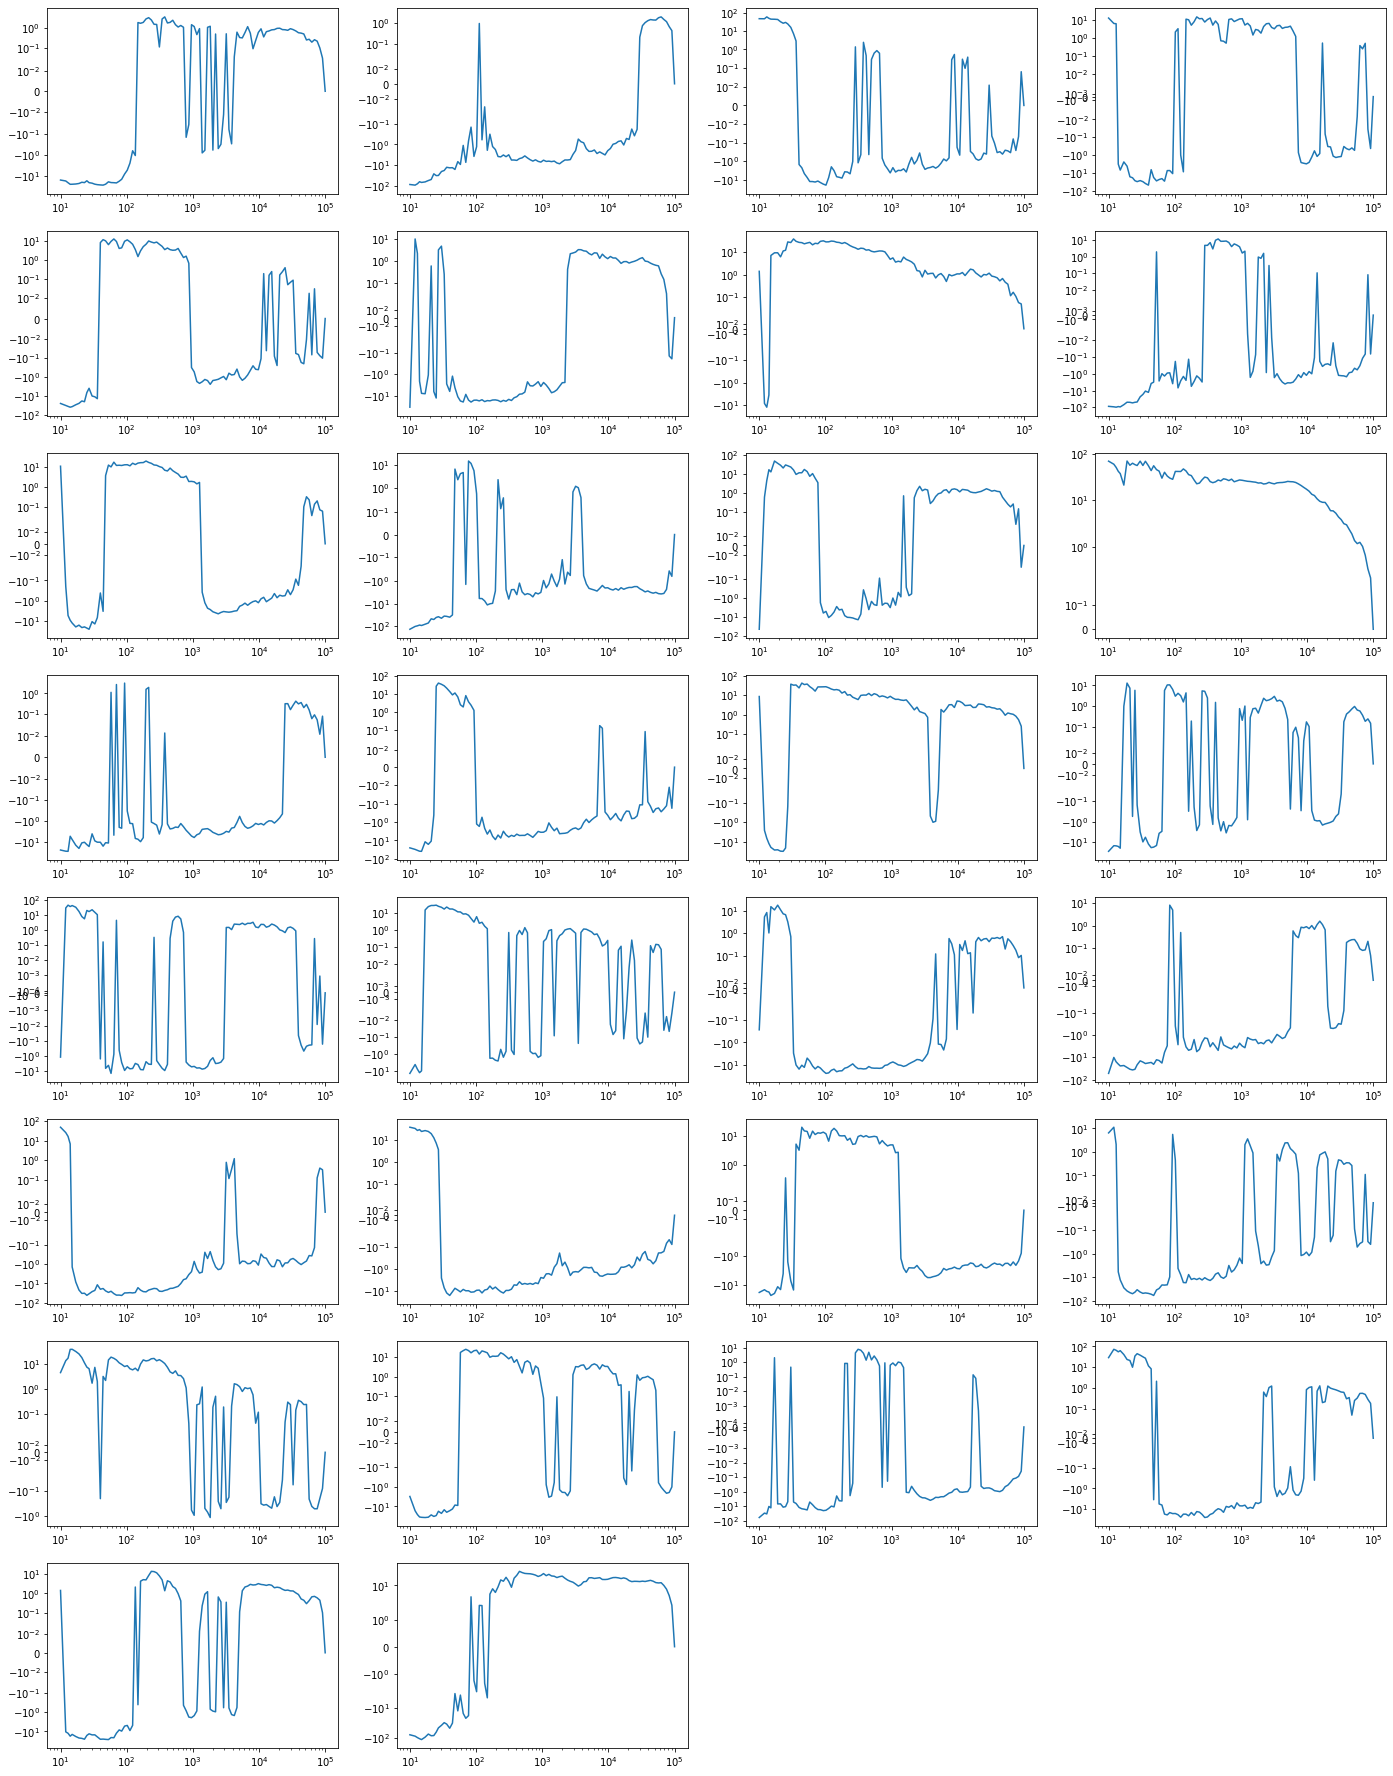

In [18]:
splt.init( ceil( len( data ) / 4 ), 4 )
for d in data:
    splt.next()
    func = np.vectorize( lambda i: np.std( d['chunks'][:i], ddof = 1 ) )
    xs = np.logspace( 1, np.log10( len( d['chunks'] ) ), 100, dtype=int )
    ys = func( xs )
    ys = ys - np.mean( ys[-1] )
    
    plt.plot( xs, ys )

    plt.xscale( 'log' )
    plt.yscale( 'symlog', linthreshy = np.min( np.abs( ys[:-1] ) ) )